In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

## Importação do DataFrame "Drugs"

In [3]:
df = pd.read_csv('./SRC/drogas.csv')
df.columns = ['IDADE', 'SEXO','PRESSAO_SANGUE', 'COLESTEROL', 'SODIO_POTACIO', 'DROGA']

### Transformação dos dados categoricos em numéricos

In [4]:
lista = ['SEXO','PRESSAO_SANGUE', 'COLESTEROL', 'DROGA']
for i in lista:
    df[i] = LabelEncoder().fit_transform(df[i])

In [5]:
df

,IDADE,SEXO,PRESSAO_SANGUE,COLESTEROL,SODIO_POTACIO,DROGA
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


## Funções

In [6]:
def print_matriz_confusao(y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()


## Testando as funções

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df, df['DROGA'], test_size=0.25)

In [8]:
modelo = KNeighborsClassifier().fit(X_train, y_train)
y_predict = modelo.predict(X_test)

Precisão do KNN com 25% dedicado ao treino

In [9]:
accuracy_score(y_test, y_predict)

0.82

Resumo

In [224]:
classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        17\n           1       0.75      1.00      0.86         6\n           2       0.60      0.60      0.60         5\n           3       0.25      0.50      0.33         2\n           4       0.67      0.40      0.50        10\n\n    accuracy                           0.78        40\n   macro avg       0.65      0.70      0.66        40\nweighted avg       0.79      0.78      0.77        40\n'

f1-score

In [10]:
f1_score(y_test, y_predict, average='macro')

0.6288238176917422

### Matriz de confusão

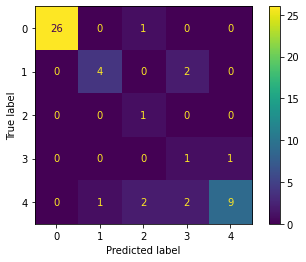

In [11]:
print_matriz_confusao(y_test, y_predict)

### Gráfico de K-Vizinhos x Precisão

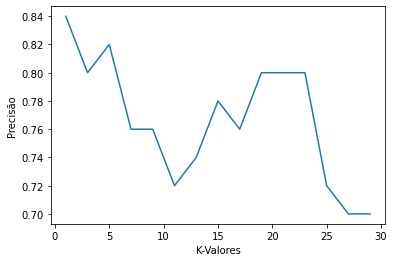

In [90]:
k = []
precisao = []
for i in range(1,30,2):
    k.append(i)
    modelo = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_predict = modelo.predict(X_test)
    precisao.append(accuracy_score(y_test, y_predict))
fig, ax = plt.subplots()
ax.plot(k, precisao)
ax.set(ylabel='Precisão', xlabel='K-Valores')
plt.show()


Qual melhor tamanho para blocos no K-fold?

## Comparando KFold e Hold out

In [206]:
X, y = df.drop(columns=['DROGA']).to_numpy(), df['DROGA']

In [222]:
kf = KFold(shuffle=True)

media = 0
for train_index, test_index in kf.split(df):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    modelo = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    media+= accuracy_score(y_test, modelo.predict(X_test))
media/5

0.6900000000000001

In [223]:
media = 0
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(df, df['DROGA'], test_size=0.20, shuffle=True)
    modelo = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    y_predict = modelo.predict(X_test)
    media+= accuracy_score(y_test, y_predict)

media/5

0.8099999999999999

Os 2 trechos de códigos acima fazem quase o mesmo papel: Criam modelos de machine learning com 80% dos dados para treino e 20% para teste, fazem isso 5 vezes cada. A diferença entre eles é que a cada iteração no método kfold, os dados de teste nunca se repetem, desta forma ele utiliza todos os dados tanto para testes quanto para treino. No método de hold out eu faço as 5 iterações com os dados totalmente de forma aleatória, ocorrendo que algumas vezes um único elemento poderá está relacionado para teste nas 5 iterações. Contúdo, não consigo destinguir se algum método é melhor que o outro, pois creio que ambos separam de forma bastante eficiente.